# Practical 5: Introduction to exiobase

Based on [Exiobase's IOT_2019_pxp.zip](https://zenodo.org/record/5589597) dataset

In [16]:
# Import modules
import pandas as pd
import numpy as np

## Data pre-processing

### Load data

In [17]:
dir_path = "../data/IOT_2019_pxp/"

The folder has the following structure:  

```
├── impacts  
│   ├── F_Y.txt  
│   ├── F.txt  
│   └── ...
├── satellite  
│   └── ...
├── A.txt
├── finaldemands.txt  
├── industries.txt  
├── products.txt  
├── unit.txt  
├── x.txt  
├── Y.txt  
└── Z.txt  
```

In [18]:
# Import A, Y, F and F_Y (from impacts)
# ! 'A' is a large datasets, mind load time
A = pd.read_csv(f'{dir_path}A.txt', delimiter="\t", header=[0,1], index_col=[0,1])
Y = pd.read_csv(f'{dir_path}Y.txt', delimiter="\t", header=[0,1], index_col=[0,1])
F = pd.read_csv(f'{dir_path}impacts/F.txt', delimiter="\t", header=[0,1], index_col=[0])
F_y = pd.read_csv(f'{dir_path}impacts/F_Y.txt', delimiter="\t", header=[0,1], index_col=[0])
F_unit = pd.read_csv(f'{dir_path}impacts/unit.txt', delimiter="\t", header=[0,1], index_col=[0])

In [19]:
# Visualize
A  # Y, F, F_Y

region                                                           AT  \
sector                                                   Paddy rice   
region sector                                                         
AT     Paddy rice                                                 0   
       Wheat                                                      0   
       Cereal grains nec                                          0   
       Vegetables, fruit, nuts                                    0   
       Oil seeds                                                  0   
...                                                             ...   
WM     Membership organisation services n.e.c. (91)               0   
       Recreational, cultural and sporting services (92)          0   
       Other services (93)                                        0   
       Private households with employed persons (95)              0   
       Extra-territorial organizations and bodies                 0   

region                                                                  \
sector                                                           Wheat   
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              3.313462e-02   
       Cereal grains nec                                  0.000000e+00   
       Vegetables, fruit, nuts                            0.000000e+00   
       Oil seeds                                          0.000000e+00   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       4.473350e-09   
       Recreational, cultural and sporting services (92)  1.155801e-06   
       Other services (93)                                3.245491e-07   
       Private households with employed persons (95)      0.000000e+00   
       Extra-territorial organizations and bodies         0.000000e+00   

region                                                                      \
sector                                                   Cereal grains nec   
region sector                                                                
AT     Paddy rice                                             0.000000e+00   
       Wheat                                                  0.000000e+00   
       Cereal grains nec                                      1.434620e-02   
       Vegetables, fruit, nuts                                0.000000e+00   
       Oil seeds                                              0.000000e+00   
...                                                                    ...   
WM     Membership organisation services n.e.c. (91)           3.998032e-09   
       Recreational, cultural and sporting services (92)      1.039146e-06   
       Other services (93)                                    2.900140e-07   
       Private households with employed persons (95)          0.000000e+00   
       Extra-territorial organizations and bodies             0.000000e+00   

region                                                                            \
sector                                                   Vegetables, fruit, nuts   
region sector                                                                      
AT     Paddy rice                                                   0.000000e+00   
       Wheat                                                        0.000000e+00   
       Cereal grains nec                                            0.000000e+00   
       Vegetables, fruit, nuts                                      6.818953e-02   
       Oil seeds                                                    0.000000e+00   
...                                                                          ...   
WM     Membership organisation services n.e.c. (91)                 3.906652e-09   
       Recreational, cultural and s

### Get labels

In [20]:
# get multiindex
region_and_sector_labels = A.index

# get each level using  'get_level_values()'
region_labels = A.index.get_level_values(level=0).unique()
sector_labels = A.index.get_level_values(level=1).unique()

# visualize
region_labels

Index(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR',
       'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO',
       'SE', 'SI', 'SK', 'GB', 'US', 'JP', 'CN', 'CA', 'KR', 'BR', 'IN', 'MX',
       'RU', 'AU', 'CH', 'TR', 'TW', 'NO', 'ID', 'ZA', 'WA', 'WL', 'WE', 'WF',
       'WM'],
      dtype='object', name='region')

## Input-Output calculations
### Leontief inverse

In [21]:
# Create an identity matrix the same order
Id = np.identity(len(region_and_sector_labels))

# Compute leontief inverse matrix in the Demand-pull model
L_values = np.linalg.inv((Id - A))
L = pd.DataFrame(L_values, index=region_and_sector_labels, columns=region_and_sector_labels)

# Visualize
L

region                                                           AT  \
sector                                                   Paddy rice   
region sector                                                         
AT     Paddy rice                                               1.0   
       Wheat                                                    0.0   
       Cereal grains nec                                        0.0   
       Vegetables, fruit, nuts                                  0.0   
       Oil seeds                                                0.0   
...                                                             ...   
WM     Membership organisation services n.e.c. (91)             0.0   
       Recreational, cultural and sporting services (92)        0.0   
       Other services (93)                                      0.0   
       Private households with employed persons (95)            0.0   
       Extra-territorial organizations and bodies               0.0   

region                                                                  \
sector                                                           Wheat   
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              1.034286e+00   
       Cereal grains nec                                  3.692041e-05   
       Vegetables, fruit, nuts                            9.075155e-06   
       Oil seeds                                          7.194489e-07   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       1.285563e-06   
       Recreational, cultural and sporting services (92)  1.189858e-05   
       Other services (93)                                4.621820e-06   
       Private households with employed persons (95)      8.405823e-06   
       Extra-territorial organizations and bodies         0.000000e+00   

region                                                                      \
sector                                                   Cereal grains nec   
region sector                                                                
AT     Paddy rice                                             0.000000e+00   
       Wheat                                                  1.255974e-05   
       Cereal grains nec                                      1.014585e+00   
       Vegetables, fruit, nuts                                7.458307e-06   
       Oil seeds                                              5.554793e-07   
...                                                                    ...   
WM     Membership organisation services n.e.c. (91)           1.222302e-06   
       Recreational, cultural and sporting services (92)      1.054426e-05   
       Other services (93)                                    4.133199e-06   
       Private households with employed persons (95)          7.917990e-06   
       Extra-territorial organizations and bodies             0.000000e+00   

region                                                                            \
sector                                                   Vegetables, fruit, nuts   
region sector                                                                      
AT     Paddy rice                                                   0.000000e+00   
       Wheat                                                        1.935838e-05   
       Cereal grains nec                                            4.634264e-05   
       Vegetables, fruit, nuts                                      1.073192e+00   
       Oil seeds                                                    5.466588e-07   
...                                                                          ...   
WM     Membership organisation services n.e.c. (91)                 1.178493e-06   
       Recreational, cultural and s

### Product output X

In [22]:
# Computer using L
X = L @ Y.sum(axis=1)

# Visualize
X

region  sector                                           
AT      Paddy rice                                               0.000000
        Wheat                                                  359.797737
        Cereal grains nec                                      864.548099
        Vegetables, fruit, nuts                               1665.261805
        Oil seeds                                              177.704503
                                                                 ...     
WM      Membership organisation services n.e.c. (91)         22050.245221
        Recreational, cultural and sporting services (92)    56804.439934
        Other services (93)                                  35533.355190
        Private households with employed persons (95)         6245.828637
        Extra-territorial organizations and bodies               0.000000
Length: 9800, dtype: float64

## Extension intensities 

Problems when diagonalizing product output:
- There are often 0's in `X` when working with real data
- we can **NOT** invert singular matrix (singular matrix can be due to multiple reasons, but in our case it's because of 0's)
- 1/x does **NOT** work either (due to 0's)

Tips: treat 0's and non 0's differently
- divide only 


In [23]:
# when we try to diagonalize X
try:
    inv_diag_X = np.linalg.inv(np.diag(X))
except np.linalg.LinAlgError as err:
    print(f"Can not diagonalize X: {err}")

Can not diagonalize X: Singular matrix


In [27]:
# method 1: compute inv(diag(X)) alternatively
# X_ = X.copy()
# # we reverse the "inverse" and "diagonalize" steps compared to previous Practicals
# # ! For a vector, 1/diag(x) = inv(diag(x)), but not generalizable to any matrices
# mask = X!=0
# X_[mask] = 1 / (X[mask])  # we only divide non 0's
# inv_diag_X = np.diag(X_)  # and then we diagonalize
# # then we can continue as normal
# f = F @ inv_diag_X
# f.columns = region_and_sector_labels


# Method 2: skip inv(diag(X))
f = F / X.transpose()
f = f.replace([np.inf, -np.inf, np.nan], 0)  # ! don't forget to replace
f.columns = region_and_sector_labels

# Visualise
f

region                                                     AT                \
sector                                             Paddy rice         Wheat   
impact                                                                        
Value Added                                               0.0  6.758705e-01   
Employment                                                0.0  2.162651e-02   
Employment hour                                           0.0  4.759831e+04   
GHG emissions (GWP100) | Problem oriented appro...        0.0  1.690932e+06   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...        0.0  6.446307e-03   
...                                                       ...           ...   
Unused Domestic Extraction - Oil and Gas                  0.0  0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals         0.0  0.000000e+00   
Unused Domestic Extraction - Iron Ore                     0.0  0.000000e+00   
Unused Domestic Extraction - Non-ferous metal ores        0.0  0.000000e+00   
Land use Crop, Forest, Pasture                            0.0  7.079127e+00   

region                                                                \
sector                                             Cereal grains nec   
impact                                                                 
Value Added                                                 0.742589   
Employment                                                  0.016105   
Employment hour                                         36782.612201   
GHG emissions (GWP100) | Problem oriented appro...     935119.414396   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...          0.002427   
...                                                              ...   
Unused Domestic Extraction - Oil and Gas                    0.000000   
Unused Domestic Extraction - Non-metalic Minerals           0.000000   
Unused Domestic Extraction - Iron Ore                       0.000000   
Unused Domestic Extraction - Non-ferous metal ores          0.000000   
Land use Crop, Forest, Pasture                              4.918618   

region                                                                      \
sector                                             Vegetables, fruit, nuts   
impact                                                                       
Value Added                                                       0.690073   
Employment                                                        0.022381   
Employment hour                                               50517.645427   
GHG emissions (GWP100) | Problem oriented appro...           181589.602023   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                0.000605   
...                                                                    ...   
Unused Domestic Extraction - Oil and Gas                          0.000000   
Unused Domestic Extraction - Non-metalic Minerals                 0.000000   
Unused Domestic Extraction - Iron Ore                             0.000000   
Unused Domestic Extraction - Non-ferous metal ores                0.000000   
Land use Crop, Forest, Pasture                                    0.926486   

region                                                            \
sector                                                 Oil seeds   
impact                                                             
Value Added                                         8.318040e-01   
Employment                                          2.495181e-02   
Employment hour                                     5.897691e+04   
GHG emissions (GWP100) | Problem oriented appro...  1.301896e+06   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...  3.198484e-03   
...                                                          ...   
Unused Domestic Extraction - Oil and Gas            0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals   0.000000e+00   
Unused Domestic Extraction - Iron Ore      

In [28]:
np.allclose(f_, f)

True

## GWP100 footprint 

$\text{F} = \text{f} \mathbf{L}\text{Y} + \text{F}_{hh}$  
$\text{e} = \mathbf{fLY} + \text{e}_{y}$

### World GWP100 footprint

In [10]:
GWP100 = "GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)"

# World GWP100 footprint
f.loc[GWP100] @ L @ Y.sum(axis=1) + F_y.loc[GWP100].sum()

# for more readability
f_ = f.loc[GWP100]
Y_ = Y.sum(axis=1)
e_y = F_y.loc[GWP100].sum()
# result
e_gwp100_world = f_ @ L @ Y_ + e_y
e_gwp100_world

48909860730288.54

### Dutch GWP100 footprint

In [11]:
# NL GWP100 footprint
country = "NL"
f.loc[GWP100] @ L @ Y.loc[:, country].sum(axis=1) + F_y.loc[GWP100, country].sum()

# for more readability
f_ = f.loc[GWP100]
Y_ = Y.loc[:, country].sum(axis=1)  # Only select the country we want
e_y = F_y.loc[GWP100, country].sum()   # Only select the country we want
# result
e_gwp100_nl = f_ @ L @ Y_ + e_y
e_gwp100_nl

243866962504.66052

### GWP100 footprint per region

In [12]:
# GWP100 per regions (just omit '.sum(axis=1)')
f_ = f.loc[GWP100]
Y_ = Y
e_y = F_y.loc[GWP100]
# result
e_gwp100_regions = f_ @ L @ Y_ + e_y
e_gwp100_regions.groupby('region').sum()

region
AT    1.158115e+11
AU    5.784306e+11
BE    1.745299e+11
BG    4.558756e+10
BR    1.025567e+12
CA    6.494624e+11
CH    1.099013e+11
CN    1.238320e+13
CY    1.162636e+10
CZ    1.336683e+11
DE    1.111603e+12
DK    8.275923e+10
EE    1.895684e+10
ES    3.811165e+11
FI    7.768262e+10
FR    6.181189e+11
GB    7.435698e+11
GR    1.560702e+11
HR    2.780947e+10
HU    8.306224e+10
ID    1.001248e+12
IE    1.023151e+11
IN    3.653585e+12
IT    5.826037e+11
JP    1.539401e+12
KR    8.463511e+11
LT    2.715822e+10
LU    1.801138e+10
LV    1.755720e+10
MT    6.794109e+09
MX    6.562948e+11
NL    2.438670e+11
NO    8.708787e+10
PL    4.243816e+11
PT    8.589938e+10
RO    1.177037e+11
RU    1.632240e+12
SE    9.453218e+10
SI    2.221986e+10
SK    5.595148e+10
TR    5.594576e+11
TW    2.754243e+11
US    7.318662e+12
WA    3.402136e+12
WE    5.706044e+11
WF    2.601158e+12
WL    1.403648e+12
WM    2.699683e+12
ZA    3.353496e+11
Name: GHG emissions (GWP100) | Problem oriented approach: base

### Distribution of Dutch GWP100 footprint

In [13]:
# for more readability
f_ = np.diag(f.loc[GWP100])  # ! we need to diagonalize first
Y_ = Y.loc[:, country].sum(axis=1)  # Only select the country we want
# e_y = 0   # ! do not account for final demand
# result
e_gwp100_nl_breakdown = f_ @ L @ Y_ 
e_gwp100_nl_breakdown.index = region_and_sector_labels
e_gwp100_nl_breakdown

region  sector                                           
AT      Paddy rice                                           0.000000e+00
        Wheat                                                4.292527e+06
        Cereal grains nec                                    5.089358e+06
        Vegetables, fruit, nuts                              1.165802e+06
        Oil seeds                                            1.811192e+06
                                                                 ...     
WM      Membership organisation services n.e.c. (91)         1.146188e+05
        Recreational, cultural and sporting services (92)    1.094390e+06
        Other services (93)                                  1.883958e+06
        Private households with employed persons (95)        1.699515e+05
        Extra-territorial organizations and bodies           0.000000e+00
Length: 9800, dtype: float64

In [14]:
# aggregate and sort results for more clarity
results = e_gwp100_nl_breakdown.groupby(["region"]).sum().sort_values(ascending=False)
n = 15
results[:n]  # only show first nth

region
NL    6.546349e+10
WA    1.949135e+10
CN    1.640461e+10
WM    1.312401e+10
RU    1.174816e+10
WF    9.444350e+09
DE    6.981255e+09
WL    6.673217e+09
US    6.585898e+09
GB    4.848567e+09
BE    4.814385e+09
IN    4.029210e+09
WE    3.359266e+09
ZA    3.231949e+09
PL    3.119139e+09
dtype: float64

<AxesSubplot:title={'center':'Footprint distribution of NL (top 15 countries)'}, xlabel='region', ylabel='%'>

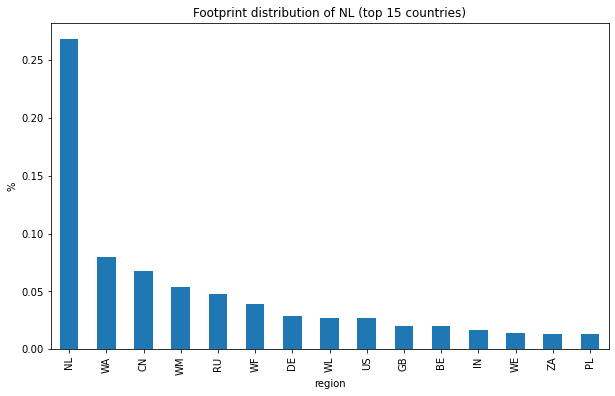

In [15]:
# Plot results in percentage

(results[:15]/e_gwp100_nl).plot(
    figsize = (10,6),
    kind = 'bar',
    ylabel = "%",
    # ylabel = F_unit.loc[GWP100].values, #
    title = f"Footprint distribution of {country} (top {n} countries)",
)